# $\text{Simple pendulum}$
### $\text{Theoretical and numerical analysis}$

##### $\textbf{Author:}$ $\text{Edy Alberto Flores Leal}$

---
---

### $\text{1. Theoretical model of a simple pendulum}$
One of the most common systems studied in Mechanics is the pendulum. A (simple) pendulum consists of a mass attached to a rod (with negligible mass) from a pivot, oscillating under the influence of gravity (Yépez Mulia and Yépez Martínez, 2012). For this system, we could use Newton's or Lagrange's formalisms to obtain the equations of motion. Taking advantage of the latter, we get the kinetic and potential energies of the pendulum. First, the $(x,y)$ coordinates are given by
$$
\begin{split}
    x &= \ell \sin(\theta),\\
    y &= \ell - \ell \cos(\theta).
\end{split} 
$$

Therefore, the first time-derivative of $x$ and $y$ yields
$$
\begin{split}
    \dot{x} &= \ell \dot{\theta} \cos(\theta),\\
    \dot{y} &= \ell \dot{\theta} \sin(\theta).
\end{split}
$$

The kinetic energy is thus expressed as
$$
    T = \dfrac{1}{2} m ( \dot{x}^2 + \dot{y}^2 ) = \dfrac{1}{2} m \ell^2 \dot{\theta}.
$$

On the other hand, the potential energy is only determined by the $y$ coordinate,
$$
    U = m g y = m g \ell \left[ 1 - \cos(\theta) \right].
$$

Thus, the Lagrangian of the system is given by
$$
    \mathcal{L} = T - U = \dfrac{1}{2} m \ell^2 \dot{\theta}^2 - m g \ell \left[ 1 - \cos(\theta) \right].
$$

Knowing the Lagrangian, we could use the Euler-Lagrange equations:
$$
    \dfrac{\partial \mathcal{L}}{\partial q} - \dfrac{\mathrm{d}}{\mathrm{d} t} \left( \dfrac{\partial \mathcal{L}}{\partial \dot{q}} \right) = 0.
$$

This situation is fairly easy because there is only one variable in the Lagrangian. Now, we have that
$$
\begin{split}
    \dfrac{\partial \mathcal{L}}{\partial \theta} 
    &= -mg\ell\sin(\theta),\\
    \dfrac{\partial \mathcal{L}}{\partial \dot{\theta}} 
    &= \ell^2 \dot{\theta} \Rightarrow \dfrac{\mathrm{d}}{\mathrm{d} t} \left( \dfrac{\partial \mathcal{L}}{\partial \dot{\theta}} \right) = m \ell^2 \ddot{\theta}.
\end{split}
$$

Putting everything together, the Euler-Lagrange equation takes the following form:
$$
\begin{split}
    -m g \ell \sin(\theta) - \ell^2 \ddot{\theta} &= 0\\
     \ddot{\theta} + \dfrac{g}{\ell} \sin(\theta) &= 0.
\end{split}
$$

This is a Nonlinear Second-Order Ordinary Differential Equation (ODE), so we will require to exploit the benefits of numerical methods. However, if we consider a small angle, we see that
$$
    \sin(\theta) = \theta + O(\theta^3),
$$

so the differential equation reduces to
$$
\ddot{\theta} + \dfrac{g}{\ell} \theta = 0.
$$

This ODE could be solved analytically. We will focus on the non-linear situation.

### $\text{2. Numerical analysis}$
Because the equation of motion of the pendulum is a Nonlinear Second-Order ODE, it is convenient to think about the Runge-Kutta method (Tenenbaum and Pollard, 1985). In particular, we use the Fourth-Order Runge-Kutta method, which establishes that the approximation of $y(x_{1})$ is
$$
    y(x_{0} + h) = y(x_{0}) + \dfrac{1}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4}),
$$

where
$$
\begin{align*}
    k_{1} &= h f(x_{0}, y_{0}), \\
    k_{2} &= h f\left(x_{0} + \dfrac{1}{2} h, y_{0} + \dfrac{1}{2} k_{1}\right), \\
    k_{3} &= h f\left(x_{0} + \dfrac{1}{2} h, y_{0} + \dfrac{1}{2} k_{2}\right), \\
    k_{4} &= h f(x_{0} + h, y_{0} + k_{3}),
\end{align*}
$$

$h$ being the step taken. This process yields an approximation of $y(x_{n + 1})$ using $y(x_{n})$ as input value. Let's introduce a new variable, let's say $\omega$, which represents the angular velocity,
$$
\begin{align*}
    \dot{\theta} &= \omega, \\
    \dot{\omega} &= \ddot{\theta} = -\dfrac{g}{\ell} \sin(\theta).
\end{align*}
$$

We use the new variable because the Runge-Kutta method is valid for First-Order ODE, so we changed a Second-Order ODE into two First-Order ODE. Conversely, we will need to solve both equations. Let's say that the equation for $k_{4}$ is $f(t,\theta,\omega) = \omega$ and equation for $\dot{\theta}$ is $g(t,\theta, \omega) = -(g / \ell) \sin(\theta)$. Hence, we need to evaluate the following expressions:
$$
\begin{align*}
    k_{1,\theta} &= \Delta t f(t_{0},\theta_{0},\omega_{0}), & k_{1,\omega} &= \Delta t g(t_{0},\theta_{0},\omega_{0}), \\
    %
    k_{2,\theta} &= \Delta t f\left(t_{0} + \dfrac{1}{2}\Delta t, \theta_{0} + \dfrac{1}{2}k_{1,\theta}, \omega_{0} + \dfrac{1}{2}k_{1,\omega}\right), & k_{2,\omega} &= \Delta t g\left(t_{0} + \dfrac{1}{2}\Delta t, \theta_{0} + \dfrac{1}{2}k_{1,\theta}, \omega_{0} + \dfrac{1}{2}k_{1,\omega}\right), \\
    %
    k_{3,\theta} &= \Delta t f\left(t_{0} + \dfrac{1}{2}\Delta t, \theta_{0} + \dfrac{1}{2}k_{2,\theta}, \omega_{0} + \dfrac{1}{2}k_{2,\omega}\right), & k_{3,\omega} &= \Delta t g\left(t_{0} + \dfrac{1}{2}\Delta t, \theta_{0} + \dfrac{1}{2}k_{2,\theta}, \omega_{0} + \dfrac{1}{2}k_{2,\omega}\right), \\
    %
    k_{4,\theta} &= \Delta t f(t_{0} + \Delta t, \theta_{0} + k_{3,\theta}, \omega_{0} + k_{3,\omega}), & k_{4,\omega} &= \Delta t g(t_{0} + \Delta t, \theta_{0} + k_{3,\theta}, \omega_{0} + k_{3,\omega}).
\end{align*}
$$

More explicitly, we need to evaluate these expressions:
$$
\begin{align*}
    k_{1, \theta} &= \Delta t \omega_{0}, & k_{1, \omega} &= -\dfrac{g \Delta t}{\ell} \sin(\theta_{0}), \\
    k_{2, \theta} &= \Delta t \left(\omega_{0} + \dfrac{1}{2} k_{1, \omega} \omega_{0} \right), & k_{2, \omega} &= -\dfrac{g \Delta t}{\ell} \sin \left(\theta_{0} + \dfrac{1}{2} k_{1} \theta_{0} \right), \\
    k_{3, \theta} &= \Delta t \left(\omega_{0} + \dfrac{1}{2} k_{2, \omega} \omega_{0} \right), & k_{3, \omega} &= -\dfrac{g \Delta t}{\ell} \sin \left(\theta_{0} + \dfrac{1}{2} k_{2} \theta_{0} \right), \\
    k_{4, \theta} &= \Delta t(\omega_{0} + k_{3, \omega}) & k_{4, \omega} &= -\dfrac{g \Delta t}{\ell} \sin\left(\theta_{0} + k_{3, \theta} \right). 
\end{align*}
$$

Remember that we use these parameters to compute these approximations:
$$
    \begin{split}
        \theta_{n + 1} &= \theta_{n} + \dfrac{1}{6}(k_{1, \theta} + 2 k_{2, \theta} + 2 k_{3, \theta} + k_{4, \theta}),\\
        \omega_{n + 1} &= \omega_{n} + \dfrac{1}{6}(k_{1, \omega} + 2 k_{2, \omega} + 2 k_{3, \omega} + k_{4, \omega})
    \end{split} 
$$

To solve this ODE, we require initial conditions. It is possible to explore the behavior of this system under different sets of these initial conditions, but we will start considering an initial angle and initial angular velocity of
$$
    \theta(0) = \dfrac{\pi}{4} \, \mathrm{rad}, \hspace{1ex} \omega(0) = 3 \, \dfrac{\mathrm{rad}}{\mathrm{s}}.
$$

At this point, we have all the information needed to solve the problem. To do so, we will provide a detailed approach using different programming languages to solve numerically the ODE.

---

---

### $\text{2. Code}$
We start calling the libraries we will need for the numerical solution.

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,          # linewidth
    'text.usetex': True,           # LaTeX font
    'font.family': 'sans serif',   # Serif family
    'font.size': 20,               # font size
    'axes.titlesize': 26,          # title size
    'axes.grid': True,             # grid
    'grid.linestyle': "-.",        # grid style
    'axes.facecolor': '#ECECEC',   # Background color for the axes
    'figure.facecolor': '#FFFFFF', # Background color for the figure
    'legend.facecolor': '#FFFFFF'  # Background color for the legend
})

We will solve the ODE in a period from $t_{0} = 0\:\mathrm{s}$ to $t_{\mathrm{f}} = 10\:\mathrm{s}$ using a step size of $\Delta t = 0.01\:\mathrm{s}$. We define the physical parameters and initial conditions. We declare this as follows:

In [3]:
# Physical parameters
g = 9.81                      # gravity (kg/m^2)
l = 1                         # length  (m)

# Initial conditions
θ0 = np.pi / 4                # initial angle            (rad)
ω0 = 3.0                      # initial angular velocity (rad/s)

# Time parameters
t_0 = 0                       # initial time (s)
t_f = 10                      # final time   (s)
Δt = 0.01                     # step size    (s)
n = int((t_f - t_0) / Δt) + 1 # iterations
t = np.linspace(t_0, t_f, n)  # time array  (s)

It is relevant to mention that we define the time parameter as a $\textcolor{blue}{\texttt{np.linspace}}$ array. However, it can also be declared as an empty vector that gets updated in every iteration. In the end, this choice is a matter of preference. We now define the Fourth-Order Runge-Kutta method:

In [4]:
# Fourth-Order Runge-Kutta function
def RK4(f, x0, y0, z0, h):
    k1y = h * f(x0, y0, z0)[0]
    k1z = h * f(x0, y0, z0)[1]
    #
    k2y = h * f(x0 + h / 2, y0 + k1y / 2, z0 + k1z / 2)[0]
    k2z = h * f(x0 + h / 2, y0 + k1y / 2, z0 + k1z / 2)[1]
    #
    k3y = h * f(x0 + h / 2, y0 + k2y / 2, z0 + k2z / 2)[0]
    k3z = h * f(x0 + h / 2, y0 + k2y / 2, z0 + k2z / 2)[1]
    #
    k4y = h * f(x0 + h, y0 + k3y, z0 + k3z)[0]
    k4z = h * f(x0 + h, y0 + k3y, z0 + k3z)[1]

    # Approximation
    y1 = float(y0 + (k1y + 2 * k2y + 2 * k3y + k4y) / 6)
    z1 = float(z0 + (k1z + 2 * k2z + 2 * k3z + k4z) / 6)
    return y1, z1

This function takes the following inputs:
- $f$: functions to evaluate.
- $x_{0}$: initial condition (independent variable).
- $y_{0}$: initial condition (dependent variable).
- $z_{0}$: initial condition (dependent variable).
- $h$: step size.

The next step is to define the functions

In [6]:
# Differential Equations
def f(t, θ, ω):
    return ω, -(g / l) * np.sin(θ)

That is, $\texttt{f(t, θ, ω)}$ defines the equations
$$
\begin{align*}
    \dot{\theta} &= \omega, \\
    \dot{\omega} &= -\dfrac{g}{\ell} \sin(\theta).
\end{align*}
$$

In [7]:
# Initial arrays
θ, θ[0] = np.zeros(n), θ0
ω, ω[0] = np.zeros(n), ω0

In the previous code, we create an empty array of $n$ elements and store the initial conditions as the first value. Finally, we perform the $\texttt{for}$ cycle:

In [8]:
# RK4 method evaluation
for i in range(n - 1):
    θ[i + 1], ω[i + 1] = RK4(f, t[i], θ[i], ω[i], Δt)

If we plot $t$ versus $\theta$, and $t$ versus $\omega$, we obtain the following plots:

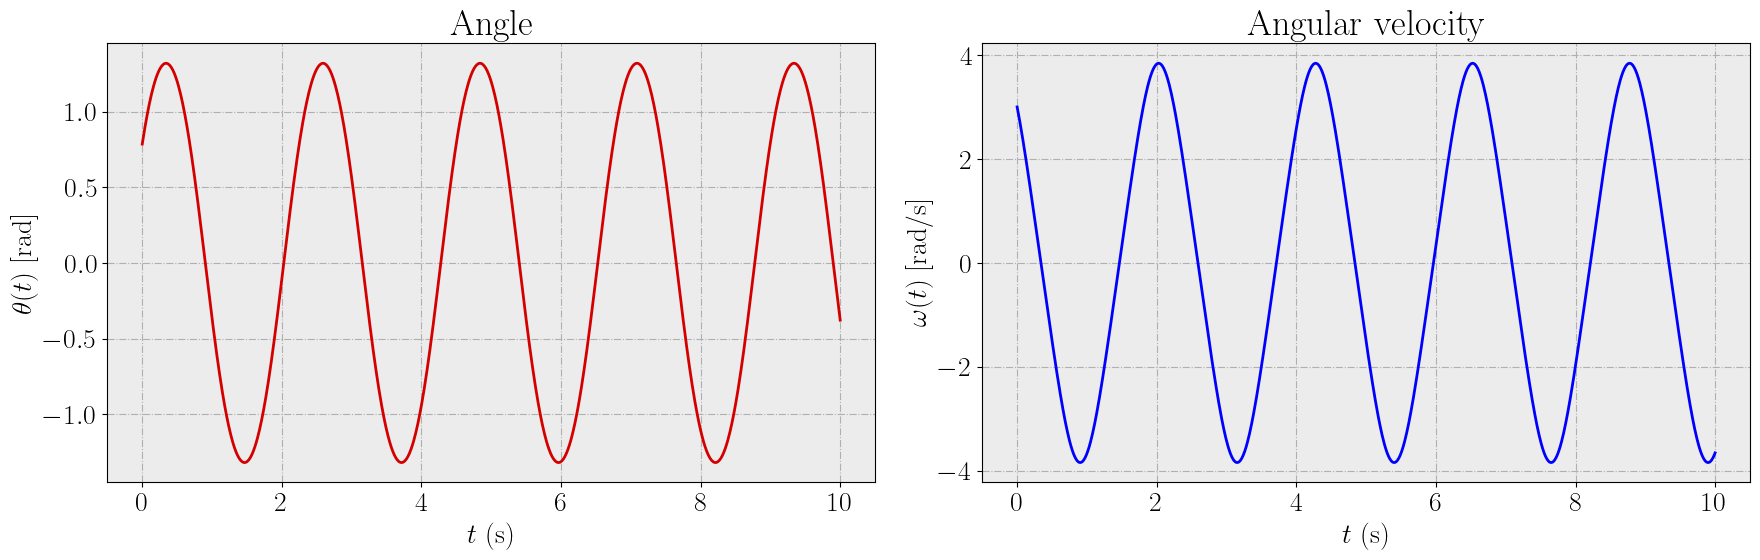

In [13]:
# Left-hand side plot
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
plt.plot(t, θ, color = '#D40000')
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$\theta(t)$ [rad]')
plt.title(r'Angle')

# Right-hand side plot
plt.subplot(1, 2, 2)
plt.plot(t, ω, color = '#0000FF')
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$\omega(t)$ [rad/s]')
plt.title(r'Angular velocity')

plt.tight_layout()